In [23]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_predict
from sklearn.metrics import confusion_matrix, jaccard_score , classification_report
from sklearn import metrics
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
url = 'https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [26]:
X = df[['Glucose','BMI','Age','Pregnancies']]
y = df['Outcome']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [39]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [40]:
y_predict = knn.predict(X_test)

In [41]:
# baholash

jaccard_score(y_test, y_predict)

0.6

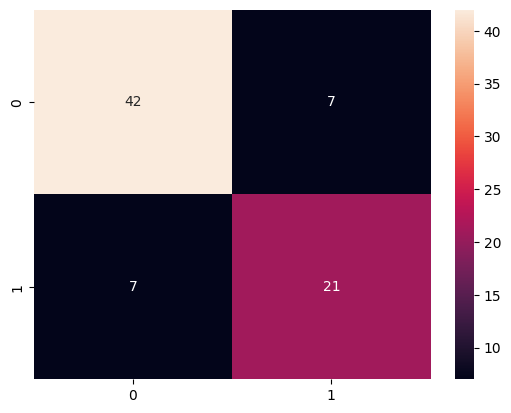

In [42]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [43]:
confusion_matrix(y_test, y_predict)

array([[42,  7],
       [ 7, 21]])

In [44]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        49
           1       0.75      0.75      0.75        28

    accuracy                           0.82        77
   macro avg       0.80      0.80      0.80        77
weighted avg       0.82      0.82      0.82        77



In [45]:
# Cross validation
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       500
           1       0.71      0.61      0.65       268

    accuracy                           0.77       768
   macro avg       0.76      0.74      0.74       768
weighted avg       0.77      0.77      0.77       768



In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=17),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [47]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [48]:
# Model

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
# Baholash

y_predict = tree_model.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77        49
           1       0.61      0.71      0.66        28

    accuracy                           0.73        77
   macro avg       0.71      0.72      0.71        77
weighted avg       0.74      0.73      0.73        77



In [50]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.7272727272727273


In [51]:
# Cross Validation

predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       500
           1       0.57      0.61      0.59       268

    accuracy                           0.70       768
   macro avg       0.68      0.68      0.68       768
weighted avg       0.71      0.70      0.71       768



In [52]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        49
           1       0.74      0.82      0.78        28

    accuracy                           0.83        77
   macro avg       0.82      0.83      0.82        77
weighted avg       0.84      0.83      0.83        77



In [53]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.8311688311688312
